In [ ]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re 
import pickle
import string
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from collections import Counter

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def url_to_transcript(url):
    pageData = requests.get(url).text 
    soup = BeautifulSoup(pageData, "lxml") 
    text = [p.text for p in soup.find(class_="elementor-widget-theme-post-content").find_all('p')]
    return text

urls = ['http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/']

comedians = ['Dave Chappelle','Bill Burr', 'Jim Jefferies', 'John Mulaney','Anthony Jeselnik', 'Mike Birbiglia','Joe Rogan']

In [ ]:
transcripts = []
for u in urls:
  transcripts.append(url_to_transcript(u))

In [ ]:
ls = []
for i in range(len(comedians)):
  s=""
  for j in range(len(transcripts[i])):
    s=s+transcripts[i][j]
  ls.append(s)

data = {'Comedians':comedians,'transcript':ls}
data_df = pd.DataFrame(data)  
data_df.to_pickle("corpus.pkl")
data_df

,Comedians,transcript
0,Dave Chappelle,This is Dave. He tells dirty jokes for a livin...
1,Bill Burr,"[cheers and applause] All right, thank you! Th..."
2,Jim Jefferies,[Car horn honks] [Audience cheering] [Announce...
3,John Mulaney,"Armed with boyish charm and a sharp wit, the f..."
4,Anthony Jeselnik,"Thank you. Thank you. Thank you, San Francisco..."
5,Mike Birbiglia,"Wow. Hey, thank you. Thanks. Thank you, guys. ..."
6,Joe Rogan,[rock music playing][audience cheering][announ...


In [ ]:
 #'''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
def cleaning(text):
    text = text.lower()
    text = re.sub('[.*?]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

clean = lambda x: cleaning(x) 
data_clean = pd.DataFrame(data_df.transcript.apply(clean))
data_clean

,transcript
0,this is dave he tells dirty jokes for a living...
1,cheers and applause all right thank you thank ...
2,car horn honks audience cheering announcer lad...
3,armed with boyish charm and a sharp wit the fo...
4,thank you thank you thank you san francisco th...
5,wow hey thank you thanks thank you guys hey se...
6,rock music playingaudience cheeringannouncerla...


In [ ]:
cleanTranscripts = []
for i in range(len(data_clean)):
  cleanTranscripts.append(data_clean.iloc[i,0])
finaldata = {'Comedians':comedians,'transcript':cleanTranscripts}
final_dataframe = pd.DataFrame(finaldata)
final_dataframe

,Comedians,transcript
0,Dave Chappelle,this is dave he tells dirty jokes for a living...
1,Bill Burr,cheers and applause all right thank you thank ...
2,Jim Jefferies,car horn honks audience cheering announcer lad...
3,John Mulaney,armed with boyish charm and a sharp wit the fo...
4,Anthony Jeselnik,thank you thank you thank you san francisco th...
5,Mike Birbiglia,wow hey thank you thanks thank you guys hey se...
6,Joe Rogan,rock music playingaudience cheeringannouncerla...


In [ ]:
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaaah,aaah,abcs,able,ablebodied,abortion,abortions,abroad,absolute,absolutely,...,yummy,ze,zealand,zeppelin,zero,zillion,zombie,zombies,zoning,éclair
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,0,0,0,1,3,...,1,1,0,0,1,1,1,1,1,0
2,0,0,0,1,2,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,3,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,2,0,0,0,0,...,0,0,10,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,1,0,0,0,0,0
6,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_dtm.to_pickle("dtm.pkl")
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [ ]:
lemmatizer = WordNetLemmatizer()
LemmatizedTranscripts = []
for i in range(len(data_clean)):
  sen = final_dataframe.iloc[i,1].split(" ")
  newsen=""
  for word in sen:
    newsen+=lemmatizer.lemmatize(word)+" "
  
  LemmatizedTranscripts.append(newsen)

Lemmatizeddata = {'Comedians':comedians,'transcript':LemmatizedTranscripts}
Lemmatized_dataframe = pd.DataFrame(Lemmatizeddata)
Lemmatized_dataframe

,Comedians,transcript
0,Dave Chappelle,this is dave he tell dirty joke for a living t...
1,Bill Burr,cheer and applause all right thank you thank y...
2,Jim Jefferies,car horn honk audience cheering announcer lady...
3,John Mulaney,armed with boyish charm and a sharp wit the fo...
4,Anthony Jeselnik,thank you thank you thank you san francisco th...
5,Mike Birbiglia,wow hey thank you thanks thank you guy hey sea...
6,Joe Rogan,rock music playingaudience cheeringannouncerla...


In [ ]:
#ngram_range
cv = CountVectorizer(stop_words='english',ngram_range=(2,3))
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaaah anybody,aaaaah anybody like,aaah shit,aaah shit scary,abcs know,abcs know hey,able acceptable,able acceptable answer,able add,able add option,...,zillion bucks,zillion bucks gets,zombie coming,zombie coming street,zombies got,zombies got backup,zoning laws,zoning laws theyll,éclair know,éclair know talk
0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#min_df 
cv = CountVectorizer(stop_words='english',min_df=2)
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,absolutely,accent,acceptable,accidentally,act,activity,actual,actually,add,...,yesterday,yo,york,youd,youll,young,youre,youtube,youve,zero
0,0,0,0,0,0,4,0,1,5,0,...,0,1,1,7,3,10,15,0,5,0
1,1,3,0,1,2,4,0,0,11,0,...,0,0,1,1,5,0,59,1,1,1
2,1,0,15,0,0,4,0,1,2,1,...,0,0,0,2,2,0,48,0,11,0
3,3,1,1,1,0,1,1,0,7,1,...,0,0,7,2,1,2,27,0,3,0
4,0,0,1,0,1,1,0,0,7,0,...,1,0,0,1,0,0,18,0,6,0
5,0,0,0,1,0,0,1,1,6,0,...,1,0,5,3,0,1,28,0,3,1
6,2,0,2,0,1,1,0,0,3,0,...,0,1,0,2,0,4,42,3,6,0


In [ ]:
#max_df
cv = CountVectorizer(stop_words='english',max_df=5)
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaaah,aaah,abcs,able,ablebodied,abortion,abortions,abroad,absolute,absolutely,...,yummy,ze,zealand,zeppelin,zero,zillion,zombie,zombies,zoning,éclair
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,0,0,0,1,3,...,1,1,0,0,1,1,1,1,1,0
2,0,0,0,1,2,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,3,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,2,0,0,0,0,...,0,0,10,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,1,0,0,0,0,0
6,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#max_features
cv = CountVectorizer(stop_words='english',ngram_range=(2,2),max_df=7,max_features=5)
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,dont know,im gonna,im like,just like,like oh
0,17,4,5,1,4
1,17,17,9,14,1
2,26,8,4,0,3
3,17,5,0,8,9
4,3,3,2,1,3
5,14,17,8,9,9
6,16,8,11,2,8


In [ ]:
data = pd.read_pickle('dtm.pkl')
data = data.transpose()

In [ ]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[comedians[c]]= list(zip(top.index, top.values))

In [ ]:
words = []
for i in range(len(comedians)):
    top = [word for (word, count) in top_dict[comedians[i]]]
    for t in top:
        words.append(t)

In [ ]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like', 'know', 'just', 'im', 'people', 'dont', 'thats', 'got', 'right']

In [ ]:
data_clean = pd.read_pickle('data_clean.pkl')
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
plt.rcParams['figure.figsize'] = [16, 6]

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",max_font_size=200, random_state=50)

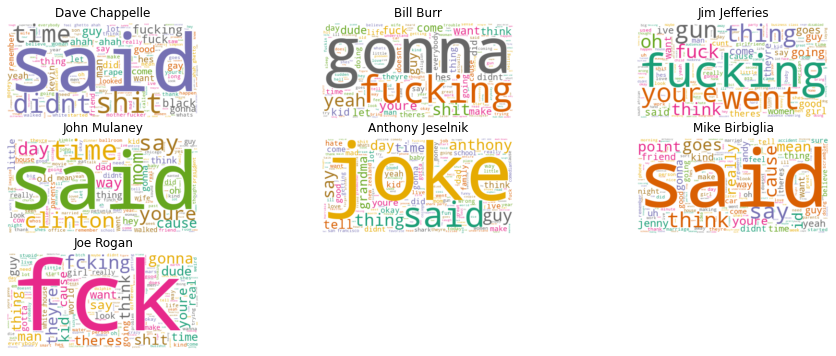

In [ ]:
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    plt.subplot(3, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(comedians[index])
    
plt.show()

Findings



*   Bill Burr, Jim Jefferies and Joe Rogan use f-word a lot.
*   Anthony Jeselink uses word joke a lot. According to me he tells a lot of jokes in his comedy sets.

*   Dave Chappelle, John Mulaney and Mike Birbiglia says "said" a lot of times. May be they tell about an incident telling what a person said.





In [ ]:
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

unique_list

[1415, 1657, 1365, 1421, 1004, 1513, 1514]

In [ ]:
total_list = []
words_per_min = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
run_times = [59, 67, 73, 77, 58, 76, 79]
for i in range(len(run_times)):
  words_per_min.append(total_list[i]/run_times[i])

words_per_min

[68.9322033898305,
 83.56716417910448,
 67.42465753424658,
 52.1948051948052,
 50.206896551724135,
 62.39473684210526,
 58.88607594936709]

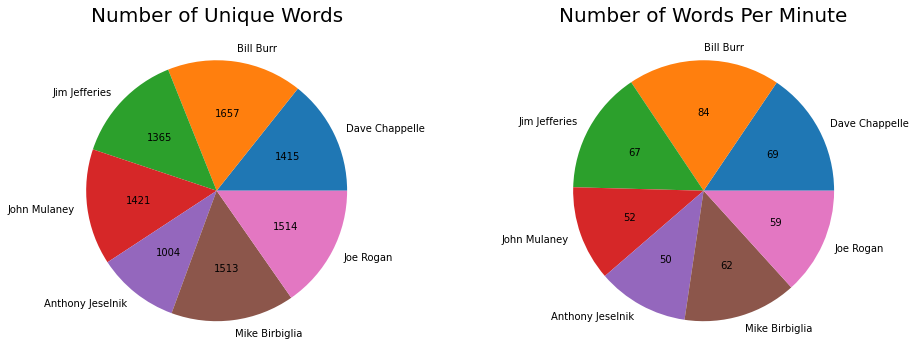

In [ ]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(rou nd(pct*total/100.0))
        return val
    return my_autopct
    
plt.subplot(1, 2, 1)
plt.pie(unique_list,labels=comedians,autopct=make_autopct(unique_list))
plt.title('Number of Unique Words', fontsize=20)


plt.subplot(1, 2, 2)
plt.pie(words_per_min,labels=comedians,autopct=make_autopct(words_per_min))
plt.title('Number of Words Per Minute', fontsize=20)

plt.show()


Findings

Number of unique words:

*   Bill Burr uses a lot of different words i.e. most among the ones compared here.
*   John Mulaney uses least number of different words among the ones compare here.

Talking Speed:

*   Bill Burr has the highest talking speed among the ones compared here. His talking speed is 84 which means on an average the time taken by him to say a word is less than a second.
*   Anthony Jeselnik has the lowest talking speed among the ones compared here.

*   Talking speed of Joe Rogan and Mike Birbiglia tells that on an average they speak one word every second.







In [ ]:
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
0,65,45
1,106,63
2,115,20
3,4,6
4,15,9
5,0,0
6,0,38


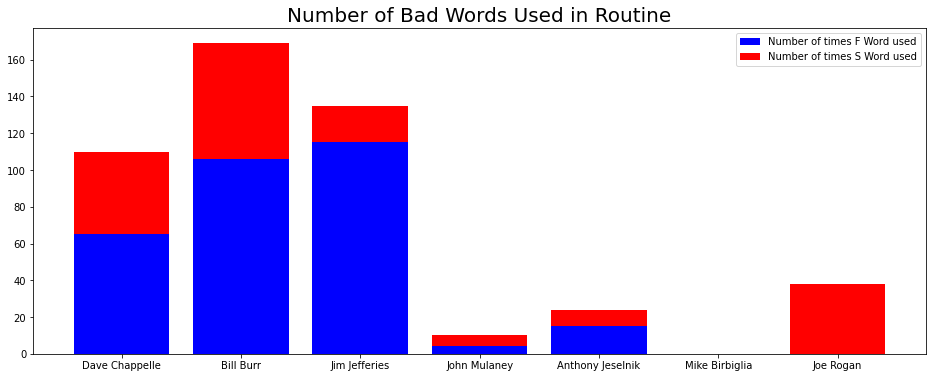

In [ ]:
x=[]
y1=[]
y2=[]
for i, comedian in enumerate(data_profanity.index):
    x.append(comedians[i])
    y1.append(data_profanity.f_word.loc[comedian])
    y2.append(data_profanity.s_word.loc[comedian])

plt.bar(x, y1, color='b')
plt.bar(x, y2,bottom = y1, color='r')
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.legend(["Number of times F Word used", "Number of times S Word used"])
plt.show()

Findings


*   Bill Burr uses f-word and s-word most of the times among all.
*   Mike Birbiglia never used a curse word.
*   Joe Rogan donot use f-word but uses s-word a lot as compared to others.
*   John Mulaney ad Anthony Jeselink occasionally uses a curse word. I would like to hear them as they donot use curse words a lot.



In [ ]:
fam = data.transpose()[['friends','kid', 'family']]
family_words = pd.concat([fam.friends, fam.kid+fam.family], axis=1)
family_words.columns = ['friends', 'family']
family_words

,friends,family
0,6,1
1,8,27
2,4,17
3,4,19
4,2,24
5,14,3
6,4,13


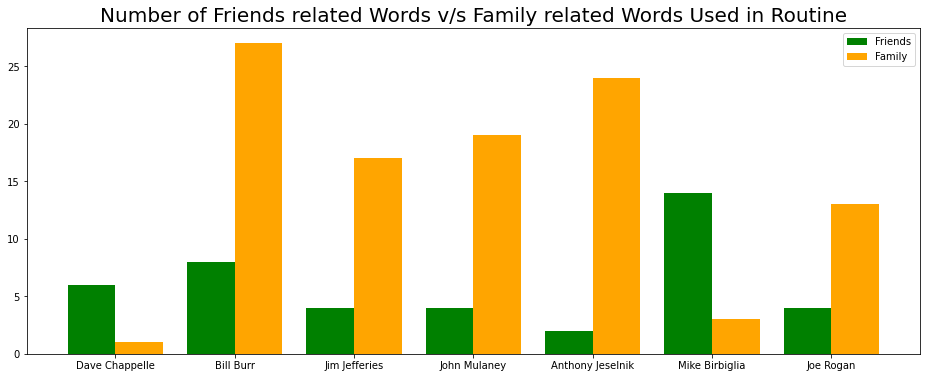

In [ ]:
x1=[]
x2=[]
y1=[]
y2=[]
for i, comedian in enumerate(family_words.index):
    x1.append((2*i)-0.4)
    x2.append((2*i)+0.4)
    y1.append(family_words.friends.loc[comedian])
    y2.append(family_words.family.loc[comedian])
  
plt.bar(x1, y1, color='green')
plt.bar(x2, y2, color='orange')
plt.xticks([r*2 for r in range(len(comedians))],comedians)
plt.title('Number of Friends related Words v/s Family related Words Used in Routine', fontsize=20)
plt.legend(["Friends", "Family"])
plt.show()

Findings

*   Dave Chappelle and Mike Birbiglia talks more about friends as compared to family. 
*   Other Comedians talk more about family as compared to friends.
*   Every comedian do talk about family and friends in their comedy set.

